In [1]:
import torch
import transformers
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

from transformers import Trainer, TrainingArguments
from transformers import BertTokenizer
from transformers import BertPreTrainedModel, BertModel, DistilBertPreTrainedModel, DistilBertModel, DistilBertConfig
from transformers import RobertaTokenizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

from sklearn.metrics import classification_report

# just checking somethingdf
from datasets import Dataset

# my custom function
import utils
import importlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# import the libraries from bert
from bert import BERT_PCL, PCLDataset, Trainer_PCL, DistillBert_PCL, RobertaPCL
from bert import predict_pcl
import bert

if not torch.cuda.is_available():
  print('WARNING: You may want to change the runtime to GPU for faster training!')
  DEVICE = 'cpu'
else:
  DEVICE = 'cuda:0'

import os
import pickle
from itertools import product
content = os.path.abspath('/vol/bitbucket/ahf119/')

# Reading in the data

In [28]:
preds_roberta_test = np.load('predictions/preds_roberta_test.npy')
preds_bert_case_test = np.load('predictions/preds_bert_cased_test.npy')
preds_bert_uncase_test = np.load('predictions/preds_bert_uncased_test.npy')

In [29]:
majority_vote_test = np.int8((preds_bert_case_test + preds_roberta_test + preds_bert_uncase_test) > 1)

In [30]:
df_train, df_val, df_test = utils.load_train_and_val()

# Analysis question 1

In [31]:
display(df_test)

,par_id,art_id,keyword,countrycode,text,label,bin_label
106,107,@@16900972,homeless,ke,"His present "" chambers "" may be quite humble ,...",3,True
148,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,True
150,151,@@19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,True
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,True
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,True
...,...,...,...,...,...,...,...
10462,10463,@@4676355,refugee,pk,""" The Pakistani police came to our house and t...",0,False
10463,10464,@@19612634,disabled,ie,When Marie O'Donoghue went looking for a speci...,0,False
10464,10465,@@14297363,women,lk,Sri Lankan norms and culture inhibit women fro...,1,False
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,False


In [43]:
label4 = (df_test['label'] == 4)
true_indices = np.where(label4)[0]
true_labels = df_test[label4].bin_label.astype(int)
predicted_labels = majority_vote_test[true_indices]
accuracy4 = np.mean(true_labels == predicted_labels)

In [44]:
label3 = (df_test['label'] == 3)
true_indices = np.where(label3)[0]
true_labels = df_test[label3].bin_label.astype(int)
predicted_labels = majority_vote_test[true_indices]
accuracy3 = np.mean(true_labels == predicted_labels)

In [45]:
label2 = (df_test['label'] == 2)
true_indices = np.where(label2)[0]
true_labels = df_test[label2].bin_label.astype(int)
predicted_labels = majority_vote_test[true_indices]
accuracy2 = np.mean(true_labels == predicted_labels)

In [53]:
label1 = (df_test['label'] == 1)
true_indices = np.where(label1)[0]
true_labels = df_test[label1].bin_label.astype(int)
predicted_labels = majority_vote_test[true_indices]
accuracy1 = np.mean(predicted_labels == 1)

In [54]:
label0 = (df_test['label'] == 0)
true_indices = np.where(label0)[0]
true_labels = df_test[label0].bin_label.astype(int)
predicted_labels = majority_vote_test[true_indices]
accuracy0 = np.mean(predicted_labels == 1)

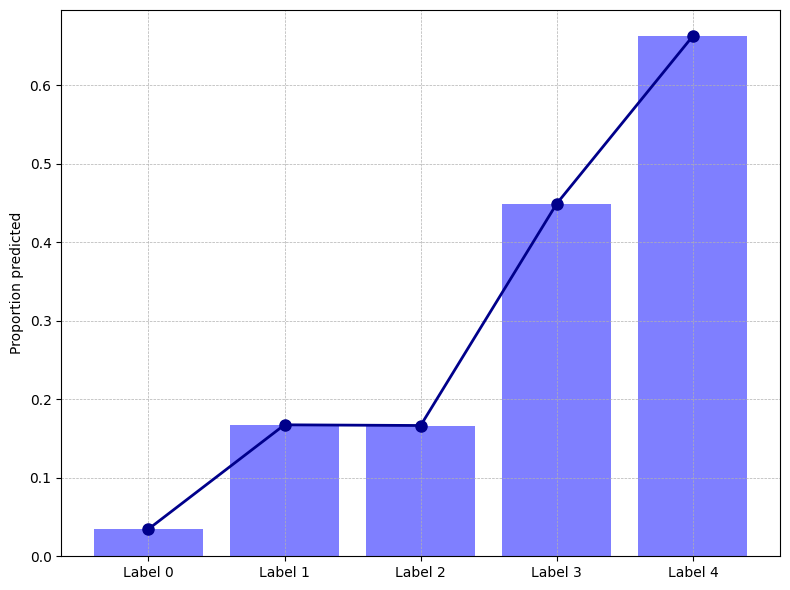

In [65]:
accuracy_values = [accuracy0, accuracy1, accuracy2, accuracy3, accuracy4]  # Example values
accuracy_labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bar_positions = np.arange(len(accuracy_values))
plt.bar(bar_positions, accuracy_values, color='blue', alpha=0.5, label='Proportion PCL predicted')

# Adding a trend line
plt.plot(bar_positions, accuracy_values, color='darkblue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Adding the labels and title
plt.xticks(bar_positions, accuracy_labels)
plt.ylabel('Proportion predicted')
# plt.title('Prediction PCL predicted per label on test set')
# plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('PCL_per_label')
plt.show()

In [61]:
print(accuracy1, accuracy2)

0.16753926701570682 0.16666666666666666


In [67]:
print(accuracy4)

0.6630434782608695


In [8]:
df = pd.read_csv('data/task4_test.tsv', sep='\t')

In [9]:
len(df)

3831